

# **Facial Landmark Detection with Dlib**

1. Apply Facial Landmark Detection


In [1]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [9]:
!wget -O shape_predictor_68_face_landmarks.dat.bz2 http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2025-03-15 05:16:02--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-03-15 05:16:02--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  16.6MB/s    in 5.0s    

2025-03-15 05:16:08 (12.3 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [10]:
!ls -lh shape_predictor_68_face_landmarks.dat

-rw-r--r-- 1 root root 96M Jul 24  2015 shape_predictor_68_face_landmarks.dat


### Facial Landmark Detection

In [3]:
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"

In [4]:
class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

In [5]:
def get_landmarks(im):
    rects = detector(im, 1)

    if len(rects) > 1:
        raise TooManyFaces
    if len(rects) == 0:
        raise NoFaces

    return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,

                    color=(0, 0, 255))
        cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

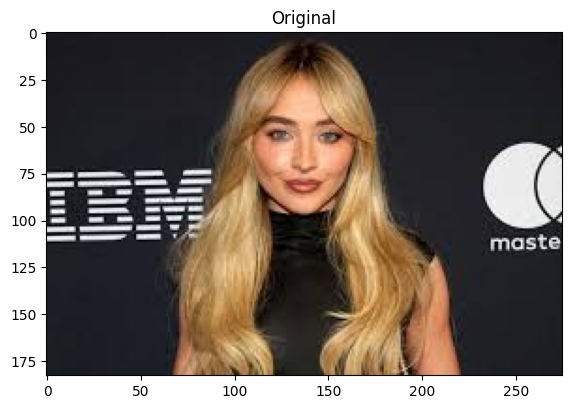

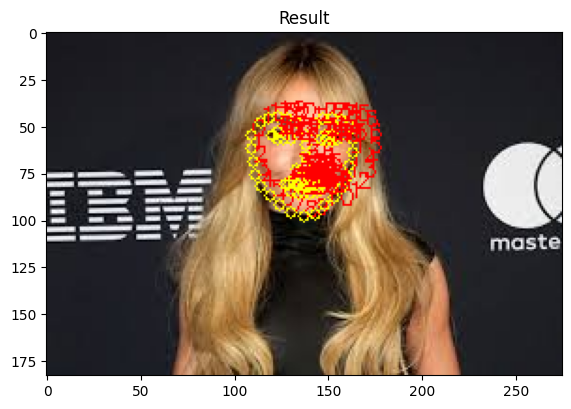

In [11]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)

image = cv2.imread('sabrina.jpeg')
imshow('Original', image)
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image, landmarks)
imshow('Result', image_with_landmarks)

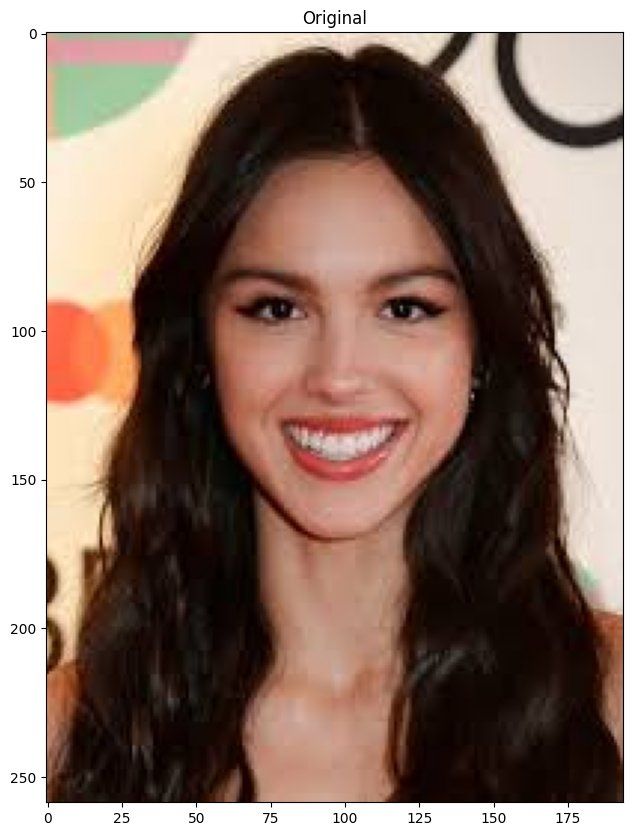

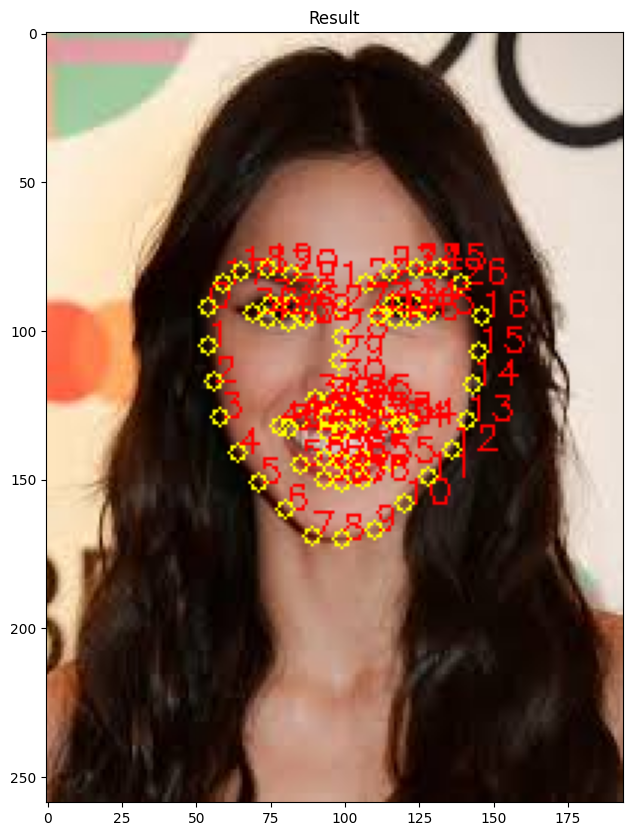

In [12]:
image = cv2.imread('olivia.jpeg')
imshow('Original', image)
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image, landmarks)
imshow('Result', image_with_landmarks)

## **What Do the Yellow Circles and Red Numbers Represent?**

### **Yellow Circles**  
- These mark the facial landmarks detected by `dlib.shape_predictor()`.
- Each circle corresponds to a specific point on the face, such as the eyes, nose, lips, or jawline.
- The 68 landmarks are predefined and cover key facial regions.

### **Red Numbers**  
- These are the index numbers (0 to 67) of the 68 landmarks.
- Breakdown:
  - **0-16**: Jawline  
  - **17-26**: Eyebrows  
  - **27-35**: Nose  
  - **36-47**: Eyes  
  - **48-67**: Mouth  